In [29]:
import pandas as pd
import numpy as np

In [30]:
import torch

torch.cuda.is_available()

True

In [31]:
df = pd.read_csv('../dataset/updated_imdb.csv', low_memory=False)

In [32]:
df

Unnamed: 0.1  Unnamed: 0   dob  photo_taken  \
0                  0           0  1899         1968   
1                  1           1  1899         1970   
2                  3           3  1899         1968   
3                  4           4  1899         1968   
4                  6           6  1924         2004   
...              ...         ...   ...          ...   
121959        460705      460705  1989         2011   
121960        460707      460707  1989         2011   
121961        460712      460712  1989         2012   
121962        460716      460716  1989         2011   
121963        460721      460721  1989         2011   

                                           full_path  gender  \
0        01/nm0000001_rm124825600_1899-5-10_1968.jpg     1.0   
1       01/nm0000001_rm3343756032_1899-5-10_1970.jpg     1.0   
2        01/nm0000001_rm946909184_1899-5-10_1968.jpg     1.0   
3        01/nm0000001_rm980463616_1899-5-10_1968.jpg     1.0   
4       02/nm0000002_rm1346607872_1924-9-16_2004.jpg     0.0   
...                                              ...     ...   
121959  08/nm3994408_rm540716544_1989-12-29_2011.jpg     0.0   
121960  08/nm3994408_rm543141888_1989-12-29_2011.jpg     0.0   
121961  08/nm3994408_rm663989760_1989-12-29_2012.jpg     0.0   
121962  08/nm3994408_rm744468480_1989-12-29_2011.jpg     0.0   
121963  08/nm3994408_rm943369728_1989-12-29_2011.jpg     0.0   

                     name                                      face_location  \
0        ['Fred Astaire']            [[1072.926  161.838 1214.784  303.696]]   
1        ['Fred Astaire']                [[477.184 100.352 622.592 245.76 ]]   
2        ['Fred Astaire']  [[622.88550564 424.21750384 844.33900767 645.6...   
3        ['Fred Astaire']  [[1013.85900236  233.88204221 1201.5861278   4...   
4       ['Lauren Bacall']  [[ 78.23569407  52.33512938 194.25423516 168.3...   
...                   ...                                                ...   
121959      ['Jane Levy']  [[249.2290693   88.51449505 379.87081187 219.1...   
121960      ['Jane Levy']                    [[321.23 146.51 451.36 276.64]]   
121961      ['Jane Levy']  [[1094.72200993  151.04900135 1316.17551196  3...   
121962      ['Jane Levy']                [[300.756  96.276 422.592 218.112]]   
121963      ['Jane Levy']  [[144.75225472 126.76472288 305.78804127 287.8...   

        face_score  second_face_score                celeb_names  celeb_id  \
0         1.459693           1.118973  ["'Lee' George Quinones"]      6488   
1         2.543198           1.852008    ["'Weird Al' Yankovic"]      6488   
2         1.872117                NaN                ['50 Cent']      6488   
3         1.158766                NaN             ['A Martinez']      6488   
4         3.479189                NaN           ['A.J. Buckley']     11516   
...            ...                ...                        ...       ...   
121959    2.663068                NaN                        NaN      8410   
121960    2.222078           0.776222                        NaN      8410   
121961    3.594701           2.786236                        NaN      8410   
121962    2.370091                NaN                        NaN      8410   
121963    4.450725                NaN                        NaN      8410   

        age  max_image_dim  
0        69     141.858000  
1        71     145.408000  
2        69     221.453502  
3        69     187.727125  
4        80     116.018541  
...     ...            ...  
121959   22     130.641743  
121960   22     130.130000  
121961   23     221.453502  
121962   22     121.836000  
121963   22     161.035787  

[121964 rows x 14 columns]

In [54]:
df.age.value_counts()[12]

481

<AxesSubplot:>

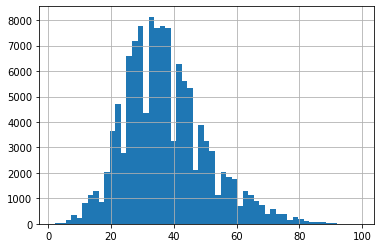

In [34]:
df.age.hist(bins=55)

In [35]:
# df = df[(df.age < df.age.quantile(.995))]
df = df[(df.age > df.age.quantile(.005))]

<AxesSubplot:>

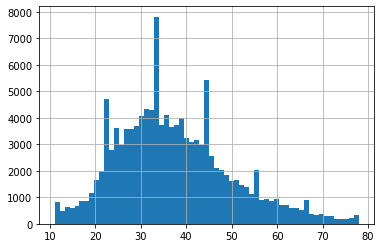

In [36]:
df.age.hist(bins=61)

In [43]:
df.age.value_counts()

78

In [41]:
df.to_csv("imbalanced.csv")

In [9]:
df = df.groupby('age').head(2000)
df

Unnamed: 0.1  Unnamed: 0   dob  photo_taken  \
0                  0           0  1899         1968   
1                  1           1  1899         1970   
2                  3           3  1899         1968   
3                  4           4  1899         1968   
8                 20          20  1924         1988   
...              ...         ...   ...          ...   
121910        460481      460481  1988         2009   
121914        460505      460505  1994         2015   
121915        460511      460511  1994         2007   
121916        460514      460514  1994         2015   
121917        460519      460519  1984         2004   

                                           full_path  gender  \
0        01/nm0000001_rm124825600_1899-5-10_1968.jpg     1.0   
1       01/nm0000001_rm3343756032_1899-5-10_1970.jpg     1.0   
2        01/nm0000001_rm946909184_1899-5-10_1968.jpg     1.0   
3        01/nm0000001_rm980463616_1899-5-10_1968.jpg     1.0   
8       02/nm0000002_rm2805435904_1924-9-16_1988.jpg     0.0   
...                                              ...     ...   
121910   96/nm1997596_rm687179520_1988-7-13_2009.jpg     1.0   
121914  94/nm1997794_rm1006150400_1994-3-19_2015.jpg     1.0   
121915   94/nm1997794_rm410756096_1994-3-19_2007.jpg     1.0   
121916   94/nm1997794_rm855155456_1994-3-19_2015.jpg     1.0   
121917  98/nm1998498_rm1071549440_1984-3-30_2004.jpg     0.0   

                         name  \
0            ['Fred Astaire']   
1            ['Fred Astaire']   
2            ['Fred Astaire']   
3            ['Fred Astaire']   
8           ['Lauren Bacall']   
...                       ...   
121910  ['Steven R. McQueen']   
121914      ['Hudson Thames']   
121915      ['Hudson Thames']   
121916      ['Hudson Thames']   
121917    ['Helena Mattsson']   

                                            face_location  face_score  \
0                 [[1072.926  161.838 1214.784  303.696]]    1.459693   
1                     [[477.184 100.352 622.592 245.76 ]]    2.543198   
2       [[622.88550564 424.21750384 844.33900767 645.6...    1.872117   
3       [[1013.85900236  233.88204221 1201.5861278   4...    1.158766   
8       [[548.38500497 200.71600181 769.838507   422.1...    3.410720   
...                                                   ...         ...   
121910                [[ 89.044 114.26  201.728 226.944]]    1.435616   
121914  [[1071.978625    215.931725   1218.22058846  3...    3.662593   
121915  [[1515.36523271  261.47381132 1707.8865912   4...    3.015311   
121916                    [[324.48  78.72 460.8  215.04]]    2.422186   
121917  [[127.06229265  91.00278046 288.47609748 252.4...    4.828499   

        second_face_score                celeb_names  celeb_id  age  \
0                1.118973  ["'Lee' George Quinones"]      6488   69   
1                1.852008    ["'Weird Al' Yankovic"]      6488   71   
2                     NaN                ['50 Cent']      6488   69   
3                     NaN             ['A Martinez']      6488   69   
8                1.196696           ['Aaron Carter']     11516   64   
...                   ...                        ...       ...  ...   
121910                NaN                        NaN     18273   21   
121914           2.400289                        NaN      7678   21   
121915           2.192660                        NaN      7678   13   
121916           1.724368                        NaN      7678   21   
121917                NaN                        NaN      7517   20   

        max_image_dim  
0          141.858000  
1          145.408000  
2          221.453502  
3          187.727125  
8          221.453502  
...               ...  
121910     112.684000  
121914     146.241963  
121915     192.521358  
121916     136.320000  
121917     161.413805  

[83691 rows x 14 columns]

In [12]:
from PIL import Image
import calendar
import time
import torch
import torchvision
import os

# os.mkdir("../dataset/imdb_crop/generated")

transform = torchvision.transforms.Compose([torchvision.transforms.RandomRotation(degrees=25),
                                            torchvision.transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 5)),
                                            torchvision.transforms.RandomAdjustSharpness(sharpness_factor=2),
                                            torchvision.transforms.RandomAutocontrast(),
                                            ]
                                           )

img_root = "../dataset/imdb_crop"
for i in range(df.age.min(), df.age.max() + 1):
    age_df = df[df['age'] == i]
    _time = calendar.timegm(time.gmtime())
    for j in range(len(age_df), 2000):
        random_row = age_df.sample(ignore_index=True)
        path = random_row.full_path[0]
        img = Image.open(os.path.join(img_root, path))
        img = transform(img)
        save_path = os.path.join(img_root, f"generated/" + str(_time) + "_" + str(j) + ".jpg")
        img = img.save(save_path)
        dict = {'age': random_row.age[0], 'full_path': f"generated/" + str(_time) + "_" + str(j) + ".jpg",
                'name': random_row.name[0]}
        df = df.append(dict, ignore_index=True)


/tmp/ipykernel_27991/2795750445.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dict, ignore_index=True)
/tmp/ipykernel_27991/2795750445.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dict, ignore_index=True)
/tmp/ipykernel_27991/2795750445.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dict, ignore_index=True)
/tmp/ipykernel_27991/2795750445.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dict, ignore_index=True)
/tmp/ipykernel_27991/2795750445.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version.

In [13]:
df

Unnamed: 0.1  Unnamed: 0     dob  photo_taken  \
0                0.0         0.0  1899.0       1968.0   
1                1.0         1.0  1899.0       1970.0   
2                3.0         3.0  1899.0       1968.0   
3                4.0         4.0  1899.0       1968.0   
4               20.0        20.0  1924.0       1988.0   
...              ...         ...     ...          ...   
123995           NaN         NaN     NaN          NaN   
123996           NaN         NaN     NaN          NaN   
123997           NaN         NaN     NaN          NaN   
123998           NaN         NaN     NaN          NaN   
123999           NaN         NaN     NaN          NaN   

                                           full_path  gender  \
0        01/nm0000001_rm124825600_1899-5-10_1968.jpg     1.0   
1       01/nm0000001_rm3343756032_1899-5-10_1970.jpg     1.0   
2        01/nm0000001_rm946909184_1899-5-10_1968.jpg     1.0   
3        01/nm0000001_rm980463616_1899-5-10_1968.jpg     1.0   
4       02/nm0000002_rm2805435904_1924-9-16_1988.jpg     0.0   
...                                              ...     ...   
123995                 generated/1649516582_1995.jpg     NaN   
123996                 generated/1649516582_1996.jpg     NaN   
123997                 generated/1649516582_1997.jpg     NaN   
123998                 generated/1649516582_1998.jpg     NaN   
123999                 generated/1649516582_1999.jpg     NaN   

                         name  \
0            ['Fred Astaire']   
1            ['Fred Astaire']   
2            ['Fred Astaire']   
3            ['Fred Astaire']   
4           ['Lauren Bacall']   
...                       ...   
123995     ['Garrett Morris']   
123996    ['Hector Elizondo']   
123997      ['Eileen Atkins']   
123998     ['Garrett Morris']   
123999  ['Philip Baker Hall']   

                                            face_location  face_score  \
0                 [[1072.926  161.838 1214.784  303.696]]    1.459693   
1                     [[477.184 100.352 622.592 245.76 ]]    2.543198   
2       [[622.88550564 424.21750384 844.33900767 645.6...    1.872117   
3       [[1013.85900236  233.88204221 1201.5861278   4...    1.158766   
4       [[548.38500497 200.71600181 769.838507   422.1...    3.410720   
...                                                   ...         ...   
123995                                                NaN         NaN   
123996                                                NaN         NaN   
123997                                                NaN         NaN   
123998                                                NaN         NaN   
123999                                                NaN         NaN   

        second_face_score                celeb_names  celeb_id  age  \
0                1.118973  ["'Lee' George Quinones"]    6488.0   69   
1                1.852008    ["'Weird Al' Yankovic"]    6488.0   71   
2                     NaN                ['50 Cent']    6488.0   69   
3                     NaN             ['A Martinez']    6488.0   69   
4                1.196696           ['Aaron Carter']   11516.0   64   
...                   ...                        ...       ...  ...   
123995                NaN                        NaN       NaN   74   
123996                NaN                        NaN       NaN   74   
123997                NaN                        NaN       NaN   74   
123998                NaN                        NaN       NaN   74   
123999                NaN                        NaN       NaN   74   

        max_image_dim  
0          141.858000  
1          145.408000  
2          221.453502  
3          187.727125  
4          221.453502  
...               ...  
123995            NaN  
123996            NaN  
123997            NaN  
123998            NaN  
123999            NaN  

[124000 rows x 14 columns]

In [14]:
df.to_csv("oversampled.csv")

<AxesSubplot:>

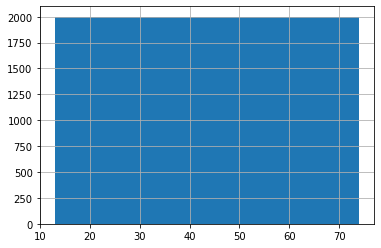

In [15]:
df.age.hist(bins=62)

In [18]:
df.age.value_counts()

69    2000
67    2000
36    2000
68    2000
29    2000
      ... 
35    2000
34    2000
61    2000
45    2000
16    2000
Name: age, Length: 62, dtype: int64